#### Question 1 : Read an image (“Image_1.jpg”) and extract the following features of the image:
1. Size of an image
2. Pixels of an image
3. Resolution of image
4. Data type
5. Random portion of image - show this portion in the submission file

In [1]:
import cv2
import numpy as np

image_1= cv2.imread('practice_data/Image_1.jpg')

In [2]:
#1. Size of an image
image_1.size

6912000

In [3]:
#2 Pixels of an image
image_1[0][0]

array([233, 145, 109], dtype=uint8)

In [4]:
#3 Resolution of an image
image_1.shape

height = image_1.shape[0]
width = image_1.shape[1]

print 'The resolution of the image is '+ str(width) + "x" + str(height)


The resolution of the image is 1920x1200


In [5]:
#4 Data type
type(image_1)

numpy.ndarray

In [6]:
#5 Random portion of image - show this portion in the submission file
import random

x1 = random.randint(0,height)
print(x1)
y1 = random.randint(0,width)
print(y1)
x2 = random.randint(x1,height)
print(x2)
y2 = random.randint(y1,width)
print(y2)
new_image = image_1[x1:x2,y1:y2]

#display the image
cv2.imshow('from_system',new_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

741
295
1193
1136


#### Question 2 :  From the "Image_1.jpg" extract the red, green and blue pixels of the image and show them in a pie-chart. (Use only numpy for RGB pixels extraction, plotting can be done using any library)

In [7]:
image_1.shape
def pixels(img):
    R=0;G=0;B=0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel=image_1[i][j]
            R += pixel[0]
            G += pixel[1]
            B += pixel[2] 
    print(R,G,B)
    return R,G,B

RGB_pixels = pixels(image_1)

(546796785, 427278091, 399170653)


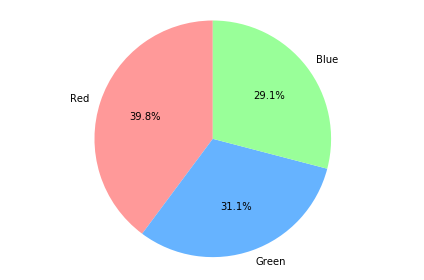

In [9]:
import matplotlib.pyplot as plt
image_1.sum(axis=0).sum(axis=1)


# display the RGB in Pie chart
labels = ['Red', 'Green', 'Blue']
sizes = [RGB_pixels[0], RGB_pixels[1], RGB_pixels[2]]

#colors
colors = ['#ff9999','#66b3ff','#99ff99']

fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

#### Question 3 : Read an input image and convert it to grayscale applying the formulas given below:Save the outputs into a folder named output.( Do not use cv2.cvtColor)

1. Lightness method:
grey=(max(R, G, B) + min(R, G, B)) / 2

2. Average method:
grey=(R + G + B) / 3

3. Luminosity method:
grey=0.21 R + 0.72 G + 0.07 B

In [14]:
image = cv2.imread('practice_data/Image_1.jpg')
r,g,b = cv2.split(image)

#Lightness method: 
grey = (np.maximum(r, g, b) + np.minimum(r, g, b)) / 2

cv2.imwrite('output/lightness_img.png', grey)


True

In [12]:
#Average method: 
grey = (r+g+b)/3

cv2.imwrite('output/average_img.png', grey)

True

In [13]:
#Luminosity method: grey=0.21 R + 0.72 G + 0.07 B

grey=0.21*r + 0.72*g + 0.07*b

cv2.imwrite('output/luminosity_img.png', grey)

True

#### Question 4 : Go to practice_data/cv_demo_data For each image extract, the image name, folder in which it is located(label), size of #image, resolution, aspect ratio in a dataframe and save the output as data_exploration.csv

In [16]:
import os
import pandas as pd
from __future__ import division
os.getcwd()

#list the contents of the current directory
lis=os.listdir('practice_data/cv_demo_data')
image_df =[]
for items in lis:
    detailed_list = os.listdir('practice_data/cv_demo_data/'+items)
    for images in detailed_list:
        img_name = images
        im = cv2.imread('practice_data/cv_demo_data/'+items+'/'+images)
        #print('Size of image : ', im.size)
        height = im.shape[0]
        width = im.shape[1]
        #print 'The resolution of the image is '+ str(width) + "x" + str(height)
        aspect_ratio = float(width) / height

        image_df.append({'Image Name': img_name,'Folder Name':items, 'Image size': im.size,'Resolution': str(width)+"X"+str(height),'Aspect Ratio':aspect_ratio})
        
        df = pd.DataFrame(image_df)
        df.to_csv('data_exploration.csv')        

#### Question 5 : Given a collage of pictures in a single image c.jpeg. Separate the images and store them in a folder.

In [ ]:
img_collage = cv2.imread('c.jpeg')

x=0
y=0
h = img_collage.shape[0]
w = img_collage.shape[1]

crop_img = img_collage[y:y+h/2, x:x+w]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0);/pl                                                                                                                          


In [ ]:
x=0
y=0
h = img_collage.shape[0]
w = img_collage.shape[1]

crop_img = img_collage[y:y+h/2, x:x+w]
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)

x1 = random.randint(0,height)
print(x1)
y1 = random.randint(0,width)
print(y1)
x2 = random.randint(x1,height)
print(x2)
y2 = random.randint(y1,width)
print(y2)
new_image = image_1[x1:x2,y1:y2]


#### Question 6 :You are given a folder of images and you have to perform some tasks/operations on each of them and filter valid images.

1. Don’t take if an image is duplicate (An image is matching exactly pixel to pixel with another image)
2. Images with very less size are not needed. (Image should be atleast 50X50 pixels)
3. Images having long/wide pixels are not needed. (Image having eitherwidth/height of the image is too less than other, The condition is ratio of them should not be more than 5).

Store whichever passes all these conditions into a separate folder named valid

In [ ]:
img_list=os.listdir('practice_data/cv_demo_data/business')
img = cv2.imread('practice_data/cv_demo_data/business/books_0_206.jpg')
print(img.shape)
k = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        k.append(img[i,j])
        print(k)






